<a href="https://colab.research.google.com/github/Distifiaoktari/klp-9-project-apm-kelas-B/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
#read data
data = pd.read_csv("sample_data/songs_normalize.csv")
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [6]:
data = data.drop(["artist","song","duration_ms","explicit","year","danceability","energy","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","genre"], axis = 1)
data

,popularity,key
0,77,1
1,79,0
2,66,7
3,78,0
4,65,8
...,...,...
1995,79,1
1996,78,9
1997,69,9
1998,75,8


In [7]:
#preprocessing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   popularity  2000 non-null   int64
 1   key         2000 non-null   int64
dtypes: int64(2)
memory usage: 31.4 KB


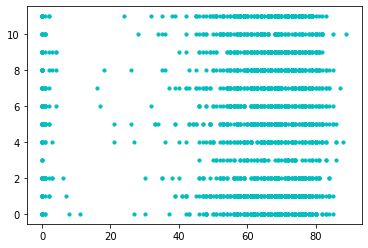

In [9]:
#visualisasi data
plt.scatter(data.popularity,data.key, s =10, c = "c", marker ="o", alpha = 1)
plt.show()

In [10]:
#buat clusters
data_x = data.iloc[:, 0:2]
x_array = np.array(data_x)
print(x_array)

[[77  1]
 [79  0]
 [66  7]
 ...
 [69  9]
 [75  8]
 [85  0]]


In [11]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.86516854, 0.09090909],
       [0.88764045, 0.        ],
       [0.74157303, 0.63636364],
       ...,
       [0.7752809 , 0.81818182],
       [0.84269663, 0.72727273],
       [0.95505618, 0.        ]])

In [12]:
kmeans = KMeans(n_clusters = 5, random_state=123)
kmeans.fit(x_scaled)

KMeans(n_clusters=5, random_state=123)

In [13]:
print(kmeans.cluster_centers_)

[[0.74292135 0.86636364]
 [0.74416595 0.10221693]
 [0.0299294  0.71198713]
 [0.74108039 0.51295416]
 [0.02612698 0.13143483]]


In [15]:
data["kluster"] = kmeans.labels_

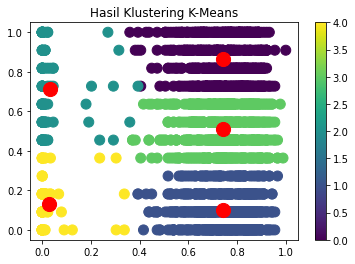

In [16]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = data.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()